In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salaries = pd.read_csv("G:\My Drive\Salaries Project\Data Science Salary 2021 to 2023.csv")

In [3]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
salaries.shape

(3761, 9)

In [5]:
salaries.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [6]:
# since there are 3 columns for salary, I will drop the salary and the currency columns
# I will consider only the "salary_in_usd" column in my analysis

In [7]:
salaries.drop(labels = ['salary', 'salary_currency'], axis = 'columns', inplace = True)
salaries

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,US,L
...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,148261,DE,M
3757,2020,SE,FT,Data Scientist,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,45618,HR,S


In [8]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary_in_usd     3761 non-null   int64 
 5   company_location  3761 non-null   object
 6   company_size      3761 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.8+ KB


In [9]:
salaries['salary_in_usd'].describe()

count      3761.000000
mean     137555.178942
std       63022.267974
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

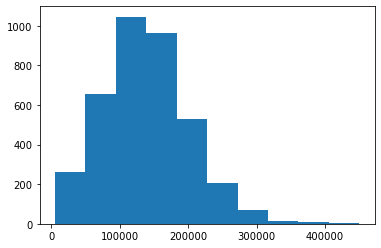

In [10]:
plt.hist(salaries['salary_in_usd'])
plt.show()
# there is a skewness in the distribution this may be because of the outliers 

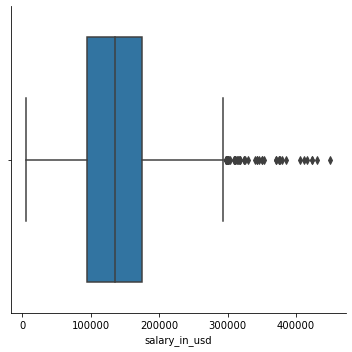

In [11]:
sns.catplot(x = 'salary_in_usd', kind = 'box', data = salaries)
plt.show()
# the boxplot shows that there is many outliers, all of them are high values, lets detect them

In [12]:
q1 = salaries['salary_in_usd'].quantile(.25)
q3 = salaries['salary_in_usd'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [13]:
# now I will put the outliers in another DataFrame, study them and then return to our filtered data set without the outliers
outliers = salaries[(salaries['salary_in_usd'] < lower) | (salaries['salary_in_usd'] > upper)]
outliers

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
122,2023,EX,FT,Head of Data,329500,US,M
136,2023,EX,FT,Director of Data Science,353200,US,M
150,2023,EX,FT,Data Engineer,310000,US,M
152,2023,EX,FT,Data Engineer,310000,US,M
156,2023,EX,FT,Data Engineer,310000,US,M
...,...,...,...,...,...,...,...
3519,2021,EX,CT,Principal Data Scientist,416000,US,S
3609,2021,MI,FT,Applied Machine Learning Scientist,423000,US,L
3710,2020,EX,FT,Director of Data Science,325000,US,L
3714,2020,MI,FT,Research Scientist,450000,US,M


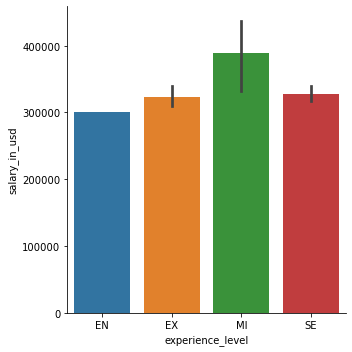

In [14]:
sns.catplot(data = outliers, kind = 'bar', x = 'experience_level', y = 'salary_in_usd', order = ['EN', 'EX', 'MI', 'SE'])
plt.show()
# it seems that they pay well for the mid level of experience!

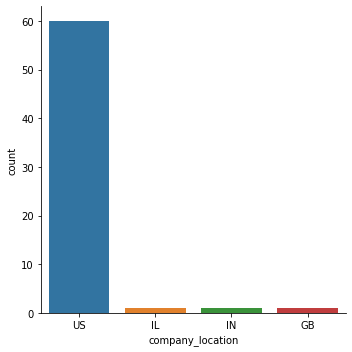

In [15]:
sns.catplot(data = outliers, kind = 'count', x = 'company_location')
plt.show()
# and almost all of the highest salaries come from companies in the united states

In [16]:
outliers['employment_type'].value_counts()
# looks like all of them had a full time job

FT    62
CT     1
Name: employment_type, dtype: int64

In [17]:
# lets go to our filtered data set without the outliers
salaries = salaries[(salaries['salary_in_usd'] > lower) & (salaries['salary_in_usd'] < upper)]
salaries

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,US,L
...,...,...,...,...,...,...,...
3755,2020,SE,FL,Computer Vision Engineer,60000,US,S
3756,2020,SE,FT,Principal Data Scientist,148261,DE,M
3757,2020,SE,FT,Data Scientist,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,US,M


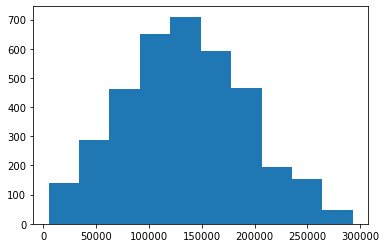

In [18]:
plt.hist(salaries['salary_in_usd'])
plt.show()
# now the distribution of the salaries seems more like a normal distribution after we removed the outliers

In [19]:
salaries['job_title'].value_counts()
# there are over 90 jobs, and it's a huge number
# I will limit the analysis to the most common job titles in the data set that appeared more than 10 times

Data Engineer                1024
Data Scientist                830
Data Analyst                  612
Machine Learning Engineer     285
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
BI Data Engineer                1
Head of Machine Learning        1
Azure Data Engineer             1
Staff Data Analyst              1
Name: job_title, Length: 92, dtype: int64

In [20]:
value_counts = salaries['job_title'].value_counts() 
condition = pd.Series(value_counts[value_counts>10].index)
condition

0                                Data Engineer
1                               Data Scientist
2                                 Data Analyst
3                    Machine Learning Engineer
4                           Analytics Engineer
5                               Data Architect
6                           Research Scientist
7                            Applied Scientist
8                         Data Science Manager
9                            Research Engineer
10                                 ML Engineer
11                                Data Manager
12                  Machine Learning Scientist
13                     Data Science Consultant
14                      Data Analytics Manager
15                    Computer Vision Engineer
16                             BI Data Analyst
17                                AI Scientist
18                       Business Data Analyst
19                             Data Specialist
20                                BI Developer
21           

In [21]:
salaries = salaries[salaries['job_title'].isin(condition)]
salaries['job_title'].value_counts()

Data Engineer                               1024
Data Scientist                               830
Data Analyst                                 612
Machine Learning Engineer                    285
Analytics Engineer                           103
Data Architect                                99
Research Scientist                            78
Applied Scientist                             55
Data Science Manager                          51
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      17
Business Data Analyst                         15
AI Scientist                                  15
BI Data Analyst                               15
Data Specialist                               14
BI Developer        

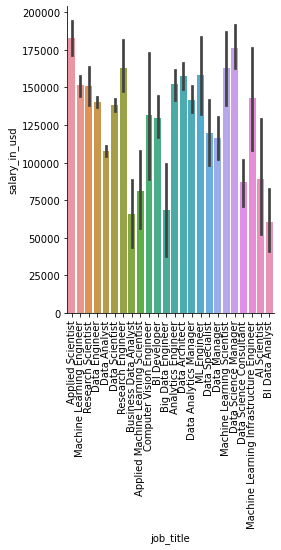

In [22]:
sns.catplot(data = salaries, kind = 'bar', x = 'job_title', y = 'salary_in_usd')
plt.xticks(rotation = 90)
plt.show()
# too many job titles, lets make them even more specified

In [23]:
# I will make categories of this cloumn and add the reult to another column
labels = ['Data Scientist', 'Data Engineering', 'Data Analytics', 'Machine Learning', 'Researching', 'Applied Science']

# these labels will become the values of the new column

In [24]:
data_science = "Data Scientist|Data Science|Data Manager"
data_engineer = "Data Engineer|Data Architect|Big Data Engineer"
data_analyst = "Analyst|Analytics"
machine_learning = "Machine Learning|ML|AI"
research = "Research"
applied_science = "Applied Scientist"



conditions = [
    (salaries['job_title'].str.contains(data_science)),
    (salaries['job_title'].str.contains(data_engineer)),
    (salaries['job_title'].str.contains(data_analyst)),
    (salaries['job_title'].str.contains(machine_learning)),
    (salaries['job_title'].str.contains(research)),
    (salaries['job_title'].str.contains(applied_science))
]

In [25]:
salaries['job_category'] = np.select(conditions, labels, default = 'other')
# now we have a new job_category column that classified jobs into categories based in whether or not some words appeared in the job_title column

C:\Users\DELL\AppData\Local\Temp/ipykernel_12704/2528609438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries['job_category'] = np.select(conditions, labels, default = 'other')


In [26]:
salaries['job_category'].value_counts()

Data Engineering    1134
Data Scientist       934
Data Analytics       767
Machine Learning     382
Researching          115
Applied Science       55
other                 44
Name: job_category, dtype: int64

In [27]:
salaries[['job_title', 'job_category']]

,job_title,job_category
0,Applied Scientist,Applied Science
1,Applied Scientist,Applied Science
4,Applied Scientist,Applied Science
5,Applied Scientist,Applied Science
6,Machine Learning Engineer,Machine Learning
...,...,...
3754,Data Scientist,Data Scientist
3755,Computer Vision Engineer,other
3757,Data Scientist,Data Scientist
3758,Data Science Manager,Data Scientist


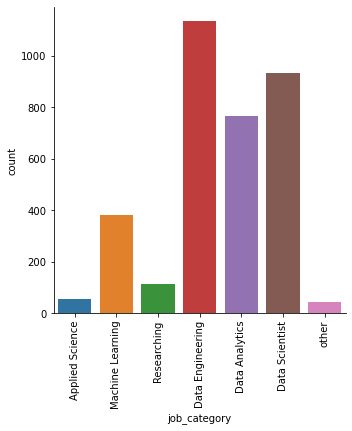

In [28]:
sns.catplot(data = salaries, kind = 'count', x = 'job_category')
plt.xticks(rotation = 90)
plt.show()
# Data Engineering, Data Scientist and Data Analytics are the most frequent job categories

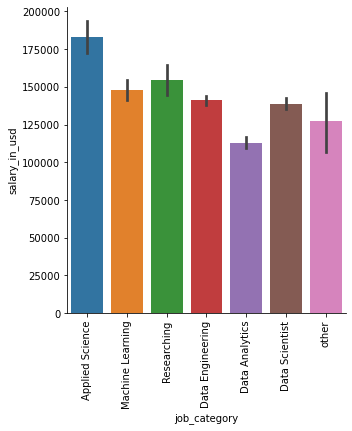

In [29]:
sns.catplot(data = salaries, kind = 'bar', x = 'job_category', y = 'salary_in_usd')
plt.xticks(rotation = 90)
plt.show()
# wow! applied science got the highest mean in salaries although it was the least frequent category

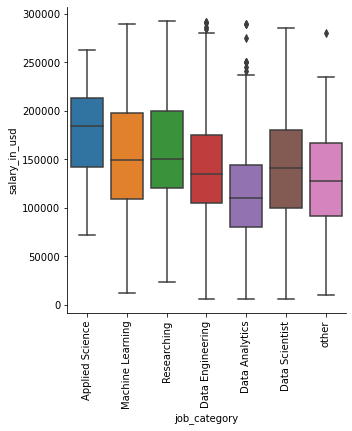

In [30]:
# lets compare the distribution of the salaries based on the job category
sns.catplot(data = salaries, x = 'job_category', y = 'salary_in_usd', kind = 'box')
plt.xticks(rotation = 90)
plt.show()

In [32]:
salaries

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,job_category
0,2023,EN,FT,Applied Scientist,213660,US,L,Applied Science
1,2023,EN,FT,Applied Scientist,130760,US,L,Applied Science
4,2023,EN,FT,Applied Scientist,204620,US,L,Applied Science
5,2023,EN,FT,Applied Scientist,110680,US,L,Applied Science
6,2023,EN,FT,Machine Learning Engineer,163196,US,M,Machine Learning
...,...,...,...,...,...,...,...,...
3754,2020,SE,FT,Data Scientist,120000,US,L,Data Scientist
3755,2020,SE,FL,Computer Vision Engineer,60000,US,S,other
3757,2020,SE,FT,Data Scientist,91237,AT,S,Data Scientist
3758,2020,SE,FT,Data Science Manager,190200,US,M,Data Scientist


In [35]:
# lets convert the salary column into a new categorical values
# I will make bins that depend on the column quantiles

minimum = salaries['salary_in_usd'].min()
twenty_fifth = salaries['salary_in_usd'].quantile(.25)
seventy_fifth = salaries['salary_in_usd'].quantile(.75)
maximum = salaries['salary_in_usd'].max()

bins = [minimum, twenty_fifth, seventy_fifth, maximum]

labels = ['Low Income', 'Medium Income', 'High Income']

In [37]:
salaries['salary_category'] = pd.cut(salaries['salary_in_usd'], labels = labels, bins = bins)

C:\Users\DELL\AppData\Local\Temp/ipykernel_12704/1277585050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries['salary_category'] = pd.cut(salaries['salary_in_usd'], labels = labels, bins = bins)


In [38]:
salaries[['salary_in_usd', 'salary_category']]

,salary_in_usd,salary_category
0,213660,High Income
1,130760,Medium Income
4,204620,High Income
5,110680,Medium Income
6,163196,Medium Income
...,...,...
3754,120000,Medium Income
3755,60000,Low Income
3757,91237,Low Income
3758,190200,High Income


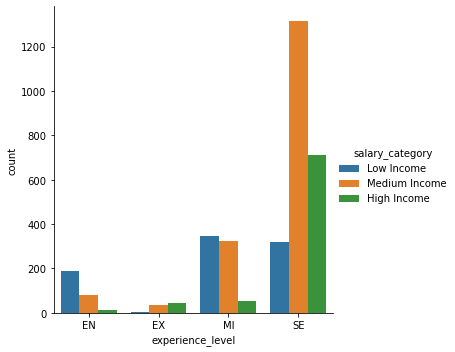

In [45]:
sns.catplot(data = salaries, x = 'experience_level', hue = 'salary_category', kind = 'count')
plt.show()
# the plot shows that seniors tend to have higher income, which makes sense

In [53]:
# now lets add some summary statistics to the table 
# I will add mean of salaries by experience and median of salaries by company size

salaries['mean_salary_by_experience'] = salaries.groupby('experience_level')['salary_in_usd'].transform(lambda x : x.mean())
salaries[['experience_level', 'mean_salary_by_experience']]

C:\Users\DELL\AppData\Local\Temp/ipykernel_12704/365773623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries['mean_salary_by_experience'] = salaries.groupby('experience_level')['salary_in_usd'].transform(lambda x : x.mean())


,experience_level,mean_salary_by_experience
0,EN,79798.757143
1,EN,79798.757143
4,EN,79798.757143
5,EN,79798.757143
6,EN,79798.757143
...,...,...
3754,SE,150813.493390
3755,SE,150813.493390
3757,SE,150813.493390
3758,SE,150813.493390


In [54]:
salaries['median_salary_by_company_size'] = salaries.groupby('company_size')['salary_in_usd'].transform(lambda x : x.median())
salaries[['company_size', 'median_salary_by_company_size']]

C:\Users\DELL\AppData\Local\Temp/ipykernel_12704/2289650048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries['median_salary_by_company_size'] = salaries.groupby('company_size')['salary_in_usd'].transform(lambda x : x.median())


,company_size,median_salary_by_company_size
0,L,108000.0
1,L,108000.0
4,L,108000.0
5,L,108000.0
6,M,140000.0
...,...,...
3754,L,108000.0
3755,S,60000.0
3757,S,60000.0
3758,M,140000.0
